In [86]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import matplotlib as mpl
import os
import pickle
mpl.rcParams['figure.dpi'] = 200

In [107]:
dir = "../Pavlov/experiments/multifunctions/DE uniform ppo wIntraDeltaF 46 functions"
dir = "../Pavlov/experiments/multifunctions/DE uniform ppo 46 wIntraDeltaF + IntraDeltaX + InterDeltaX (more training)"
filelist = os.listdir(dir)
explist = [file for file in filelist if ".bin" in file]
action_list = ["CR_max","CR_min","F_max","F_min"]
action_ylims = [(0.2,0.85),(0.2,0.85),(0,1.5),(0,1.5)]

all_exp_actions = np.empty((46, 50, len(action_list), 50))
for n_exp, file in enumerate(explist):
    with open(os.path.join(dir, file), "rb") as f:
        exp = pickle.load(f)
        for i, run in enumerate(exp):
            for j, action_lbl in enumerate(action_list):
                actions_run = [action.get(action_lbl, 0) for action in run["actions"]][1:]
                all_exp_actions[n_exp][i][j] = np.array(actions_run).reshape((50,))
all_exp_actions_mean = np.mean(all_exp_actions, axis=1)
# all_exp_actions_mean = all_exp_actions.reshape((46*50, len(action_list), 50))
actions_mean = np.mean(all_exp_actions_mean, axis=0)
actions_std = np.std(all_exp_actions_mean, axis=0)

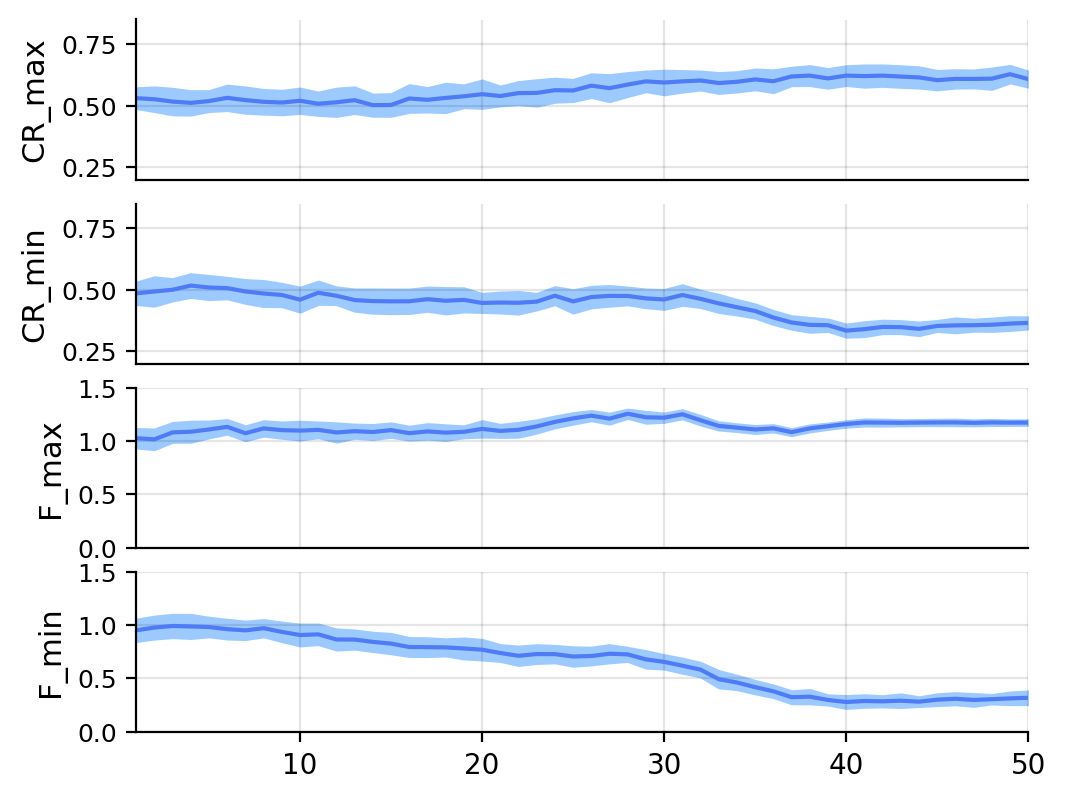

In [108]:
fig, ax = plt.subplots(figsize=(5, 4), nrows=len(action_list), sharex=True)
plt.tight_layout()
plt.subplots_adjust(hspace=0.15)

mean_color = np.array([79, 124, 247, 256])/256
std_color = np.array([158, 203, 255])/256
x = [*range(1, 51)]
for i, action_lbl in enumerate(action_list):
    ax[i].set_ylabel(action_lbl, **{"fontsize": 11})
    ax[i].plot(x, actions_mean[i], c=mean_color)
    ax[i].fill_between(x, actions_mean[i]-actions_std[i], actions_mean[i]+actions_std[i], color=std_color)
    ax[i].set_xlim((1,50))
    ax[i].set_ylim(action_ylims[i])
    if i != 3:
        ax[i].tick_params(bottom=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].grid(color="black", alpha=0.1)
    ax[i].tick_params(axis='y', which='major', labelsize=9)
plt.xticks(fontsize=10)
plt.show()